In [1]:
# ML + NLP
texts = ["Аннушка уже купила подсолнечное масло",
         "масло Олейна - вкус еды, а не масла"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)
X = vectorizer.fit_transform(texts).toarray()

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [15]:
texts = [
    'Маму,мыла чем-то раму светильник светильник светильник светильник светильник',
    'мама мама мама лампа лампа лампа лампа лампа лампа лампа лампа лампа'
]

In [46]:
cv = CountVectorizer()

m = cv.fit_transform(texts)

pd.DataFrame(m.toarray(), columns=cv.get_feature_names())

,лампа,мама,маму,мыла,раму,светильник,то,чем
0,0,0,1,1,1,5,1,1
1,9,3,0,0,0,0,0,0


In [26]:
import pymorphy2

m1 = pymorphy2.MorphAnalyzer()

In [30]:
import pymystem3
m2 = pymystem3.Mystem()

Installing mystem to /Users/petr.ermakov/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-macosx.tar.gz


In [43]:
m2.lemmatize('по Усам стекло')

['по', ' ', 'ус', ' ', 'стекло', '\n']

In [54]:
def my_tokenizer(text):
    return [x for x in m2.lemmatize(text) if re.match('^[а-яё-]+$', x)]

In [154]:
cv = CountVectorizer(tokenizer=my_tokenizer)

m = cv.fit_transform(texts)

pd.DataFrame(m.toarray(), columns=cv.get_feature_names())

,каощко,мама,мыть,оащк,оащомк,олалка,рама,уаошко,уларлуклм,щалпщока,щклпщаолм,щкоаш,щкуалка,щоаок,щоащклпм
0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,3,0,1,1,1,0,1,1,1,1,1,1,1,1


In [169]:
texts = [
    'мама мыла раму',
    'мама мама моя',
    'раму раму'
]

In [170]:
cv = TfidfVectorizer(norm=False, smooth_idf=0)

m = cv.fit_transform(texts)

pd.DataFrame(m.toarray(), columns=cv.get_feature_names())

,мама,моя,мыла,раму
0,1.405465,0.000000,2.098612,1.405465
1,2.810930,2.098612,0.000000,0.000000
2,0.000000,0.000000,0.000000,2.810930


In [172]:
pd.DataFrame([cv.idf_], columns=cv.get_feature_names())

,мама,моя,мыла,раму
0,1.405465,2.098612,2.098612,1.405465


In [173]:
cv = CountVectorizer()

m = cv.fit_transform(texts)

pd.DataFrame(m.toarray(), columns=cv.get_feature_names())

,мама,моя,мыла,раму
0,1,0,1,1
1,2,1,0,0
2,0,0,0,2


In [165]:
log(N/df)

AttributeError: 'CountVectorizer' object has no attribute 'idf_'

In [ ]:
tf-idf = tf*(log((N+1)/(df+1))+1)

In [72]:
import math
1*(math.log(2/1)+1)

1.6931471805599454

In [79]:
cv = TfidfVectorizer(smooth_idf=0)

m = cv.fit_transform(texts)

pd.DataFrame(m.toarray(), columns=cv.get_feature_names())

,каощко,мама,мыла,оащк,оащомк,олалок,раму,уаошко,уларлуклм,щалпщока,щклпщаолм,щкоаш,щкуалок,щоаок,щоащклпм
0,0.000000,0.385372,0.652491,0.000000,0.000000,0.000000,0.652491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.257007,0.455377,0.000000,0.257007,0.257007,0.257007,0.000000,0.257007,0.257007,0.257007,0.257007,0.257007,0.257007,0.257007,0.257007


In [82]:
import json

In [84]:
!curl -O https://raw.githubusercontent.com/ermakovpetr/npl_for_students/master/neg_reviews.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3561k  100 3561k    0     0  1840k      0  0:00:01  0:00:01 --:--:-- 1839k  0:00:01  0:00:01 1528k


In [85]:
!curl -O https://raw.githubusercontent.com/ermakovpetr/npl_for_students/master/pos_reviews.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4010k  100 4010k    0     0  1615k      0  0:00:02  0:00:02 --:--:-- 1615k


In [86]:
with open('pos_reviews.json') as data_file:    
    data_pos = json.load(data_file)
with open('neg_reviews.json') as data_file:    
    data_neg = json.load(data_file)

In [87]:
pos_texts = list(data_pos.keys())
neg_texts = list(data_neg.keys())
all_texts = pos_texts + neg_texts

In [89]:
target = [1]*1000+[0]*1000

In [91]:
len(all_texts)

2000

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    all_texts, target, test_size=0.33, random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression

In [129]:
logreg.fit(tf_idf.fit_transform(X_train), y_train)

LogisticRegression()

In [110]:
from sklearn.metrics import roc_auc_score



len(cv.get_feature_names())

In [141]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [200]:
logreg = LogisticRegression()

tf_idf = TfidfVectorizer(norm=False)

roc_auc_score(y_test, 
              logreg.fit(
                  tf_idf.fit_transform(X_train), y_train
              ).predict_proba(tf_idf.transform(X_test))[:,1])

/Users/petr.ermakov/_venv/voila/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9275683122847302

In [201]:
feat = pd.DataFrame(zip(logreg.coef_[0], cv.get_feature_names())).sort_values(0)

In [205]:
feat.iloc[-10:][1]

1327        also
2902      beavis
32882       well
15842         is
9958     enjoyed
2019          as
12078        fun
23794      quite
1518         and
12993      great
Name: 1, dtype: object

In [206]:
scores = []
for i in [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]:
    logreg = LogisticRegression(solver='liblinear')

    tf_idf = TfidfVectorizer(norm=False, vocabulary=list(feat.iloc[:i][1]) + list(feat.iloc[-i:][1]))

    scores.append(
        roc_auc_score(y_test, 
                  logreg.fit(
                      tf_idf.fit_transform(X_train), y_train
                  ).predict_proba(tf_idf.transform(X_test))[:,1])
    )

In [207]:
pd.DataFrame(zip(
    [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000], 
    scores)).sort_values(0)

,0,1
0,10,0.832579
1,20,0.863706
2,50,0.889653
3,100,0.893832
4,200,0.915582
5,500,0.919017
6,1000,0.917346
7,2000,0.922774
8,5000,0.926705
9,10000,0.927476


array([0., 0., 0., ..., 0., 0., 0.])

In [126]:
pd.DataFrame(zip(dt.feature_importances_, cv.get_feature_names())).sort_values(0)

,0,1
0,0.000000,00
22528,0.000000,plummeting
22527,0.000000,plummet
22526,0.000000,plummer
22525,0.000000,plumets
...,...,...
33390,0.044644,worst
32724,0.049379,waste
14089,0.065608,his
1518,0.208105,and


In [153]:
dt = DecisionTreeClassifier(max_depth=5)

cv = TfidfVectorizer(smooth_idf=0)

roc_auc_score(y_test, 
              dt.fit(
                  cv.fit_transform(X_train), y_train
              ).predict_proba(cv.transform(X_test))[:,1])

0.7005327210103327

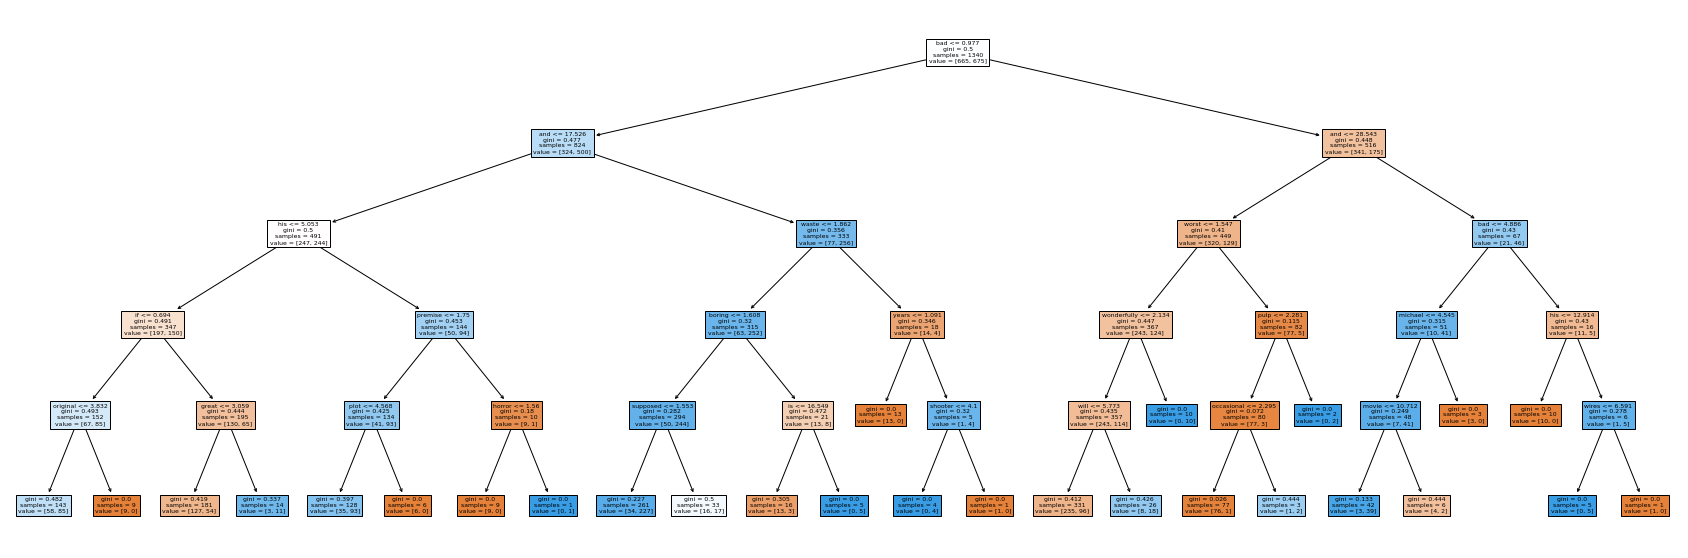

In [150]:
from matplotlib import pyplot as plt

plt.figure(figsize=(30, 10))
plot_tree(dt,
          feature_names=cv.get_feature_names(), filled=True);

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
dt = RandomForestClassifier(n_estimators=100, max_depth=5)

cv = CountVectorizer()

roc_auc_score(y_test, 
              dt.fit(
                  cv.fit_transform(X_train), y_train
              ).predict_proba(cv.transform(X_test))[:,1])

0.8447026406429391

In [220]:
from sklearn.pipeline import make_pipeline, make_union

In [235]:
pipeline = make_pipeline(
    make_union(CountVectorizer(ngram_range=(1,2)), TfidfVectorizer(norm=None))
    , LogisticRegression())

In [236]:
pipeline.fit(X_train, y_train)

/Users/petr.ermakov/_venv/voila/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('countvectorizer',
                                                 CountVectorizer(ngram_range=(1,
                                                                              2))),
                                                ('tfidfvectorizer',
                                                 TfidfVectorizer(norm=None))])),
                ('logisticregression', LogisticRegression())])

In [237]:
pipeline.steps[-1][1].coef_.shape

(1, 433044)

In [238]:
import pickle

In [233]:
pickle.dump(pipeline, open('pipeline.pckl', 'wb'))

In [ ]:
светильник кипятильник лампа

In [239]:
from gensim.models import Word2Vec

In [245]:
import nltk

In [246]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/petr.ermakov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [247]:
from nltk import tokenize

In [249]:
tokenizer = tokenize.PunktSentenceTokenizer()

In [265]:
from tqdm.notebook import tqdm
sentences = [tokenizer.tokenize(x) for x in tqdm(all_texts)]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [266]:
sentences = sum(sentences, [])

In [267]:
sentences = [tokenize.word_tokenize(x) for x in tqdm(sentences )]

  0%|          | 0/71532 [00:00<?, ?it/s]

In [268]:
w2v = Word2Vec(sentences)

In [273]:
v = w2v.wv['good']

In [280]:
w2v_all = [tokenize.word_tokenize(x) for x in tqdm(all_texts)]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [300]:
w2v_all = [[w2v.wv[x] for x in y if x in set(w2v.wv.key_to_index)] for y in tqdm(w2v_all)]

  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [301]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class W2VTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return vec

In [ ]:
стекло_
стекло_сущ